# Linear Regression

A linear model creates a linear function based on the input features to make predictions.  
In linear regression, the regression coefficients are calculated using the method of least squares.

**Least Squares Method**: This method finds the regression coefficients that minimize the mean squared error between the predicted values and the actual target values (Y) in the training set.


In [1]:
# Import the relevant libraries
# For these lessons we will need NumPy, pandas, matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings("ignore")

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

# 1. Single Linear Regression (SAT & GPA data)

## 1. load data -> plot scatter

In [2]:
# We start by loading the data
df = pd.read_csv("./data/1.01. Simple linear regression.csv")
# Let's explore the top 5 rows of the df
df

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83
...,...,...
79,1936,3.71
80,1810,3.71
81,1987,3.73
82,1962,3.76


Plot scatter (either using seaborn or matplotlib)

<Axes: xlabel='SAT', ylabel='GPA'>

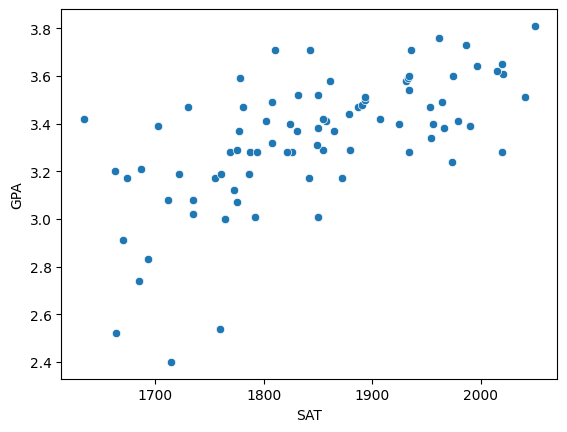

In [3]:
sns.scatterplot(x="SAT", y="GPA", data=df)

Text(0, 0.5, 'GPA')

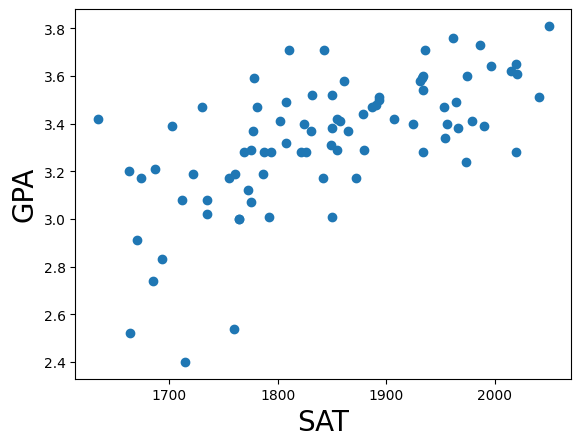

In [4]:
plt.plot(df["SAT"], df["GPA"], "o")
plt.xlabel("SAT", fontsize=20)
plt.ylabel("GPA", fontsize=20)

## 2. Declare the dependent and independent variables

In [5]:
# Declare the dependent and independent variables
# There is a single independent variable: 'SAT'
x = df["SAT"]
# and a single depended variable: 'GPA'
y = df["GPA"]

In [6]:
x  # this is wrong form to use. This is 1D. To process regression, we do need 2D form

0     1714
1     1664
2     1760
3     1685
4     1693
      ... 
79    1936
80    1810
81    1987
82    1962
83    2050
Name: SAT, Length: 84, dtype: int64

In [7]:
x_matrix = x.values.reshape(-1, 1)
print(x_matrix.shape)
x_matrix

(84, 1)


array([[1714],
       [1664],
       [1760],
       [1685],
       [1693],
       [1670],
       [1764],
       [1764],
       [1792],
       [1850],
       [1735],
       [1775],
       [1735],
       [1712],
       [1773],
       [1872],
       [1755],
       [1674],
       [1842],
       [1786],
       [1761],
       [1722],
       [1663],
       [1687],
       [1974],
       [1826],
       [1787],
       [1821],
       [2020],
       [1794],
       [1769],
       [1934],
       [1775],
       [1855],
       [1880],
       [1849],
       [1808],
       [1954],
       [1777],
       [1831],
       [1865],
       [1850],
       [1966],
       [1702],
       [1990],
       [1925],
       [1824],
       [1956],
       [1857],
       [1979],
       [1802],
       [1855],
       [1907],
       [1634],
       [1879],
       [1887],
       [1730],
       [1953],
       [1781],
       [1891],
       [1964],
       [1808],
       [1893],
       [2041],
       [1893],
       [1832],
       [18

## 3. Creating a Regression Model

To create a simple linear regression model, you can use the `LinearRegression` class from `sklearn.linear_model`.

Reference: [LinearRegression documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In this example, we use the `LinearRegression` module from `sklearn.linear_model` to create a regression model and fit it to the data using the method of least squares aka `mse`. And we are going to skip `scaling` and `train-test-split` here because these topics are out of scope


In [8]:
# and of course the actual regression (machine learning) module
from sklearn.linear_model import LinearRegression

# We start by creating a linear regression object
reg = LinearRegression()

reg.fit(x_matrix, y)  # first arg: independent var, seoncd arg dependent var

LinearRegression()

## 4. Checking Result

#### R-squared

The explanatory power of a model can be evaluated using the **R-squared (coefficient of determination)**.  
- **R-squared** measures how well the model explains the variance in the dependent variable.
- An R-squared value close to 1 indicates a model with good explanatory power.

In [9]:
r_squared = reg.score(x_matrix, y)
print("R-squared:", r_squared)
# To get the R-squared in sklearn we must call the appropriate method

R-squared: 0.40600391479679754


### What are Coefficients?

Regression coefficients represent the change in the dependent variable (\$y\$) for a one-unit change in the independent variable (\$x\$), holding all other variables constant.

### Interpretation of Coefficients

The regression coefficient (\$\beta_i\$) indicates how much \$y\$ changes when \$x_i\$ increases by 1 unit.  
For example, if the regression coefficient for SAT is \$0.00167769\$, it means that when SAT increases by 1 unit, GPA increases by approximately \$0.00167769\$.


In [10]:
print("Coefficients:", reg.coef_)
# Getting the coefficients of the regression
# Note that the output is an array, as we usually expect several coefficients

Coefficients: [0.00165569]


#### Intercept

In [11]:
# Getting the intercept of the regression
# Note that the result is a float as we usually expect a single value
reg.intercept_

0.2750402996602799

## 5. Making predictions

In [12]:
# There is a dedicated method should we want to predict values
# Note that the result is an array, as we can predict more than one value at a time
reg.predict([[1790]])

array([3.23872191])

In [13]:
# To be in line with our knowledge so far, we can create a pandas data frame with several different values of SAT
new_data = pd.DataFrame(data=[1740, 1760], columns=["SAT"])
new_data

,SAT
0,1740
1,1760


In [14]:
# We can predict the whole data frame in bulk
# Note that the result is an array, this time with 2 elements
reg.predict(new_data)

array([3.15593751, 3.18905127])

In [15]:
# Finally, we can directly store the predictions in a new series of the same dataframe
new_data["Predicted_GPA"] = reg.predict(new_data)
new_data

,SAT,Predicted_GPA
0,1740,3.155938
1,1760,3.189051


### Plotting the Regression Line on a Scatter Plot

To visualize the regression model, we can plot the regression line along with the scatter plot of the data points.

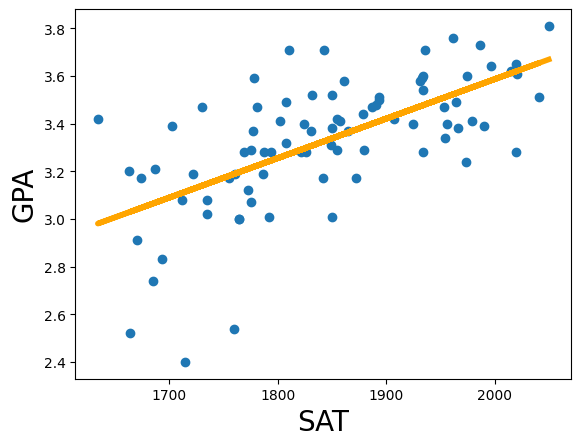

In [16]:
# There are different ways to plot the data - here's the matplotlib code
plt.scatter(x, y)

# Parametrized version of the regression line
yhat = reg.coef_ * x_matrix + reg.intercept_  # y = a*x + b

# Plotting the regression line
fig = plt.plot(x, yhat, lw=4, c="orange", label="regression line")

# Labelling our axes
plt.xlabel("SAT", fontsize=20)
plt.ylabel("GPA", fontsize=20)
plt.show()

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

# 2. Multi Linear Regression (SAT & With Random Data & GPA data)

When there are two or more independent variables, the regression is called Multiple Linear Regression.

$$y = ax + b$$
$$GPA = a * SAT + b$$
$$GPA = a1 * SAT + a2 * RandNumb + b$$

In [28]:
# For these lessons we will need NumPy, pandas, matplotlib and seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# and of course the actual regression (machine learning) module
from sklearn.linear_model import LinearRegression

## Load Data And Do Regression

In [29]:
# Load the data from a .csv in the same folder
df = pd.read_csv("./data/1.02. Multiple linear regression.csv")
df

,SAT,"Rand 1,2,3",GPA
0,1714,1,2.40
1,1664,3,2.52
2,1760,3,2.54
3,1685,3,2.74
4,1693,2,2.83
...,...,...,...
79,1936,3,3.71
80,1810,1,3.71
81,1987,3,3.73
82,1962,1,3.76


In [30]:
# There are two independent variables: 'SAT' and 'Rand 1,2,3'
x = df[["SAT", "Rand 1,2,3"]]
# and a single depended variable: 'GPA'
y = df["GPA"]

In [31]:
# We start by creating a linear regression object
reg = LinearRegression()
# The whole learning process boils down to fitting the regression
reg.fit(x, y)

LinearRegression()

In [32]:
# Getting the coefficients of the regression
reg.coef_
# Note that the output is an array

array([ 0.00165354, -0.00826982])

In [33]:
# Getting the intercept of the regression
reg.intercept_
# Note that the result is a float as we usually expect a single value

0.29603261264909486

## Model Evaluation

#### Model Evaluation - Calculating the R-squared

The `R-squared` $R$ is used to evaluate the model's performance. It measures the proportion of variance in the dependent variable that can be explained by the independent variables. A higher R-squared value indicates a better model fit.

#### Model Evaluation - Formula for Adjusted $R^2$

Adding more independent variables to a model can artificially inflate the R-squared value, even if the new variables do not meaningfully contribute to the model's predictive power. The `Adjusted R-squared` $R^2$ addresses this issue by penalizing the addition of irrelevant variables. 

$R^2_{adj.} = 1 - (1-R^2)*\frac{n-1}{n-p-1}$

In [35]:
r = reg.score(x, y)
r

0.40668119528142843

In [36]:
# If we want to find the Adjusted R-squared we can do so by knowing the r2, the # observations, the # features
r2 = reg.score(x, y)
# Number of observations is the shape along axis 0
n = x.shape[0]
# Number of features (predictors, p) is the shape along axis 1
p = x.shape[1]

# We find the Adjusted R-squared using the formula
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
adjusted_r2  # a bit decreased from r

0.39203134825134023

#### Model Evaluation - Mean Squared Error (MSE)

The **Mean Squared Error (MSE)** measures the average squared difference between the predicted values and the actual values. A lower MSE indicates a better-fitting model.

$$ \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $$


Where:  
- $y_i$: Actual value for observation $i$  
- $\hat{y}_i$: Predicted value for observation $i$  
- $n$: Total number of observations 

**Key Points:**  
- MSE penalizes larger errors more heavily due to the squaring of differences.  
- It is sensitive to outliers, so it should be interpreted with caution in the presence of extreme values.  
- Often used for regression model evaluation to quantify prediction accuracy.


In [38]:
from sklearn.metrics import mean_squared_error

y_true = y
y_pred = reg.predict(x)

mse = mean_squared_error(y_true, y_pred)
print("MSE = ", mse)

MSE =  0.04325149456531023


# Practice: California Housing Dataset

In this example, we will use the Boston Housing dataset to create a linear regression model and predict house prices.

```python
# Import necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error

# Load the Boston housing dataset
boston = load_boston()
X = boston.data  # Features
y = boston.target  # Target: house prices

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model with the training data
model.fit(X_train, y_train)

# Make predictions using the test data
y_pred = model.predict(X_test)

# Display the regression coefficients and intercept
print("Regression Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Calculate the Mean Squared Error (MSE) for model evaluation
mse = mean_squared_err


## **Single Linear Regression with California Housing Dataset**

### **Problem Description**
In this exercise, we will use the **Boston Housing Dataset** to perform **Single Linear Regression**. We will predict the **median house value** (in $1000s) based on a single feature. This example uses **'RM'** (average number of rooms per dwelling) as the independent variable, and the goal is to predict the target variable, which is the median house value, **'MEDV'**.

### **Exercise Steps**
1. **Load the Data**: Load the Boston housing dataset and understand the features.
2. **Data Exploration**: Explore the relationship between the selected feature ('RM') and the target ('MEDV').
3. **Train a Linear Regression Model**: 
   - Use the 'RM' feature to train a linear regression model.
   - Visualize the regression line and make predictions.
4. **Evaluate the Model**: Calculate the Mean Squared Error (MSE) or R-squared to evaluate the model's performance.

### **Questions**
1. **How well does the number of rooms ('RM') explain the variation in house prices ('MEDV')?**
   - Look at the R-squared value and interpret its significance.
2. **How well does the linear regression line fit the data?**
   - Visualize the scatter plot of the data points along with the fitted line.
3. **What are the key insights you can draw from this model?**
   - Discuss the relationship between the number of rooms and house prices based on the regression line.

### **Expected Results**
- **Scatter Plot and Line**: You should see a clear upward trend on the scatter plot, as more rooms generally correlate with a higher house price.
- **R-squared Value**: The R-squared value should indicate how well the 'RM' feature explains the variation in house prices. A higher value (closer to 1) indicates a better fit.
- **Model Interpretation**: The regression model should provide a coefficient for 'RM', showing how much the price changes for each additional room.

### **Learning Points**
- **Single Linear Regression** is useful for understanding the relationship between one independent variable and one dependent variable.
- The **R-squared value** helps assess the model's explanatory power. It shows the proportion of variance in the target variable that is predictable from the independent variable.
- **Data visualization** (scatter plot and regression line) is essential to better understand the relationship between the variables.

### **Libraries to Use**
- `sklearn.linear_model.LinearRegression`
- `sklearn.datasets.load_boston`
- `matplotlib.pyplot` for plotting
- `numpy` for numerical operations


In [17]:
from sklearn.datasets import fetch_california_housing

california = fetch_california_housing()

# 데이터프레임으로 변환
df = pd.DataFrame(california.data, columns=california.feature_names)
df["MedHouseVal"] = california.target  # 타겟 변수 추가()
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [18]:
y = df["MedHouseVal"]
X = df["AveRooms"]

reg = LinearRegression()
X_matrix = X.values.reshape(-1, 1)
reg.fit(X_matrix, y)

reg.predict([[10], [5.3], [4.8], [3.5]])

array([2.39249944, 2.05941611, 2.02398172, 1.93185229])

In [19]:
from sklearn.model_selection import train_test_split

y = df["MedHouseVal"]
X = df["AveRooms"]

X_train, X_test, y_train, y_test = train_test_split(X, y)

reg = LinearRegression()
X_matrix = X_train.values.reshape(-1, 1)
reg.fit(X_matrix, y_train)

y_res = reg.predict(X_test.values.reshape(-1, 1))  # 우린 답을 알고 있음.. y_test
y_res

array([2.04539873, 2.02538813, 2.10763926, ..., 2.04962725, 2.02473955,
       2.17590044])

In [20]:
# mse = mean square error
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_res)
mse

1.2912589321555454

---

In [21]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

# 데이터프레임으로 변환
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
# df['Target'] = cancer.target  # 타겟 변수 추가()
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [22]:
X = df["mean radius"]
y = df["mean perimeter"]
X_train, X_test, y_train, y_test = train_test_split(X, y)

reg = LinearRegression()
reg.fit(X_train.values.reshape(-1, 1), y_train)
y_res = reg.predict(X_test.values.reshape(-1, 1))

In [23]:
mse = mean_squared_error(y_res, y_test)
mse

2.5559613092161984

In [24]:
print(reg.score(X_train.values.reshape(-1, 1), y_train))
print(reg.score(X_test.values.reshape(-1, 1), y_test))

0.995797422928486
0.9954305617075566


<Axes: xlabel='mean radius', ylabel='mean smoothness'>

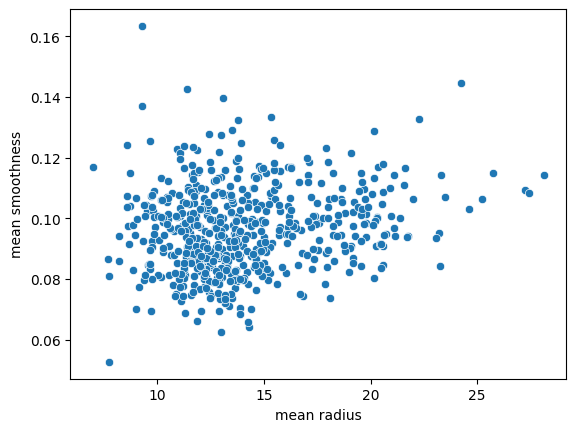

In [25]:
sns.scatterplot(data=df, x="mean radius", y="mean smoothness")

In [26]:
X = df["mean radius"]
y = df["mean smoothness"]
X_train, X_test, y_train, y_test = train_test_split(X, y)

reg = LinearRegression()
reg.fit(X_train.values.reshape(-1, 1), y_train)
y_res = reg.predict(X_test.values.reshape(-1, 1))

In [27]:
print(reg.score(X_train.values.reshape(-1, 1), y_train))
print(reg.score(X_test.values.reshape(-1, 1), y_test))

0.035894744502206644
0.015064681547969139
